In [21]:
import pandas as pd
import numpy as np
# from ThreeLayerNet import NN
from NN3Layer import ThreeLayerNN
import matplotlib.pyplot as plt

In [2]:
def test_accuracy(model, X_test, y_test):
    i = 0
    for idx, xi in enumerate(X_test):
        if model.predict(xi) != y_test[idx]:
            i+=1
    return i / len(y_test)

In [3]:
attributes = ['variance','skewness','curtosis','entropy','genuine']

df_train = pd.read_csv('../data/bank-note/train.csv', names=attributes)
df_test = pd.read_csv('../data/bank-note/test.csv', names=attributes)

df_train['genuine'].iloc[df_train['genuine'] == 0] = -1
df_test['genuine'].iloc[df_test['genuine'] == 0] = -1

X_train = df_train.loc[:, df_train.columns != 'genuine'].to_numpy(dtype='float64')
y_train = df_train['genuine'].to_numpy(dtype='float64')

X_test = df_test.loc[:, df_test.columns != 'genuine'].to_numpy(dtype='float64')
y_test = df_test['genuine'].to_numpy(dtype='float64')

C:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
NN = ThreeLayerNN(X_train.shape[1], 5, X_train, y_train)

In [5]:
sample_example = X_train[0]
y_hat = NN.forward(sample_example)
dW1, dW2, dW3 = NN.backpropogate(y_train[0], y_hat, 0.1)

In [6]:
print('Results for problem 2a:')
print('Test example:')
print(X_train[0])
print('First layer edge weight gradients:')
print(dW1)
print('Second layer edge weight gradients:')
print(dW2)
print('Third layer edge weight gradients:')
print(dW3)

Results for problem 2a:
Test example:
[ 3.8481 10.1539 -3.8561 -4.2228]
First layer edge weight gradients:
[[ -0.17125561   0.76423566   0.07691598  -0.32847588   0.45359683
   -1.50505737]
 [ -0.6590087    2.94085523   0.29598037  -1.26400804   1.74548598
   -5.79161127]
 [ -1.73891229   7.75997244   0.78099715  -3.33531126   4.6057769
  -15.28220205]
 [  0.66037874  -2.94696912  -0.2965957    1.26663585  -1.74911475
    5.80365173]
 [  0.72317817  -3.22721433  -0.32480079   1.38708796  -1.91544871
    6.35555627]]
Second layer edge weight gradients:
[[ 7.41877481e-01  1.08939298e+00 -1.28485570e+00  2.06478467e+00
   1.91825226e+00  5.46656256e-01]
 [ 3.41975813e-09  5.02166541e-09 -5.92267029e-09  9.51783059e-09
   8.84237484e-09  2.51986645e-09]
 [ 7.42100770e-01  1.08972086e+00 -1.28524241e+00  2.06540613e+00
   1.91882962e+00  5.46820788e-01]
 [ 7.41386911e-01  1.08867261e+00 -1.28400608e+00  2.06341933e+00
   1.91698381e+00  5.46294777e-01]
 [ 1.61599470e-01  2.37297037e-01 -2.7

In [20]:
widths = [5, 10, 25, 50, 100]
models = []
for width in widths:
    NN = ThreeLayerNN(X_train.shape[1], width, X_train, y_train, True)
    epochs = width * 2
    lr = 1 / (width * 10)
    NN.train(epochs, lr, 2)
    models.append(NN)
    print('Training Accuracy of NN with a width of %d : %f' % (width, test_accuracy(NN, X_train, y_train)))
    print('Test Accuracy of NN with a width of %d : %f' % (width, test_accuracy(NN, X_test, y_test)))
    print('')

c:\Users\Gabrielius Kudirka\Documents\U of U - Fall 2022\Machine Learning\repo\Neural Networks\NN3Layer.py:41: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Training Accuracy of NN with a width of 5 : 0.446101
Test Accuracy of NN with a width of 5 : 0.442000

Training Accuracy of NN with a width of 10 : 0.446101
Test Accuracy of NN with a width of 10 : 0.442000

Training Accuracy of NN with a width of 25 : 0.446101
Test Accuracy of NN with a width of 25 : 0.442000

Training Accuracy of NN with a width of 50 : 0.446101
Test Accuracy of NN with a width of 50 : 0.442000

Training Accuracy of NN with a width of 100 : 0.446101
Test Accuracy of NN with a width of 100 : 0.442000



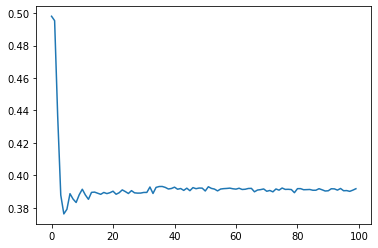

In [19]:
plt.plot(models[0].avg_losses)

In [ ]:
NN.train(100, 0.1)

c:\Users\Gabrielius Kudirka\Documents\U of U - Fall 2022\Machine Learning\repo\Neural Networks\NN3Layer.py:42: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


In [ ]:
test_accuracy(NN, X_test, y_test)

0.052

In [ ]:
NN.predict(X_test[0])

-1.0

In [22]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [29]:
sigmoid(3.9975)

0.9819695800208065

In [28]:
-1 * 1 + 2 * 0.018 + -1.5 * 0.982

3.9975